## <b>Auto-Regressive Models

Exponential smoothing-based forecasting techniques were covered, which is based on the assumption that time series is composed on deterministic and stochastic terms. The random component is zero out with number of observations considered for the forecasting. This assumes that random noise is truly random and follows independent identical distribution. However, this assumption often tends to get violated and smoothing is not sufficient to model the process and set up a forecasting model.

Auto-regressive models can be very useful as these models adjust immediately using the prior lag values by taking advantage of inherent serial correlation between observations. This chapter introduces forecasting concepts using auto-regressive models. The auto-regressive model includes auto-regressive terms or moving average terms. Based on the components used, there are multiple approaches that can be used in time series forecasting such as:
- Moving Average (MA)
- Auto-regressive (AR)
- Auto-regressive moving average (ARMA)
- Auto-regressive integrated moving average (ARIMA)

Auto-regressive models (AR models) are very good in capturing trends as the next time values are predicted based on the prior time values. Thus, AR models are very useful in situations where the next forecasted value is a function of the previous time period, such as an increase in average stock price gain due to good company growth; we expect the effect to retain over time and price should keep increasing as a function of time as the trend component.
The pth order AR model is denoted by AR(p):
\begin{align}
x_{t} & = ø_{1}x_{t-1} + ø_{2}x_{t-2} + ... + ø_{p}x_{t-p} + ∈_{t}\\
\end{align}

Here, ø is the model coefficient, ∈t ∼ N (0, σ2) is an error in time t, and p is the order of the AR model.

In [1]:
# Load modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa

/usr/local/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


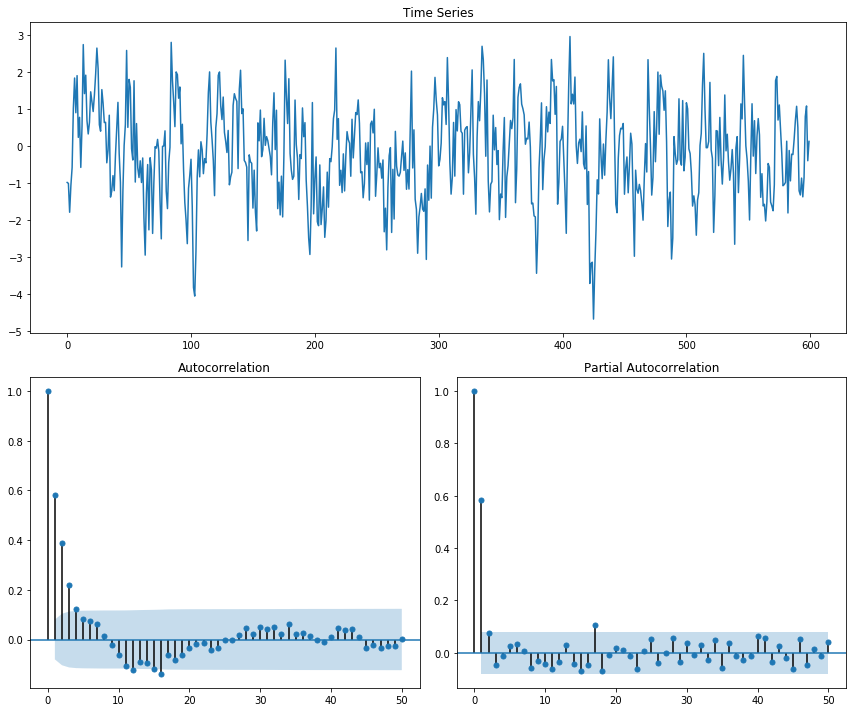

In [2]:
# Function to plot signal, ACF and PACF
def plotds(xt, nlag=30, fig_size=(12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    # Assign axes
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    # Plot graphs
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf)
    plot_pacf(xt, lags=50, ax=ax_pacf)
    plt.tight_layout()
    return None
    
        
# Number of samples
n = 600

# Generate AR(1) dataset
# stationary
ar = np.r_[1, -0.6]
ma = np.r_[1, 0]
ar1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1_data)

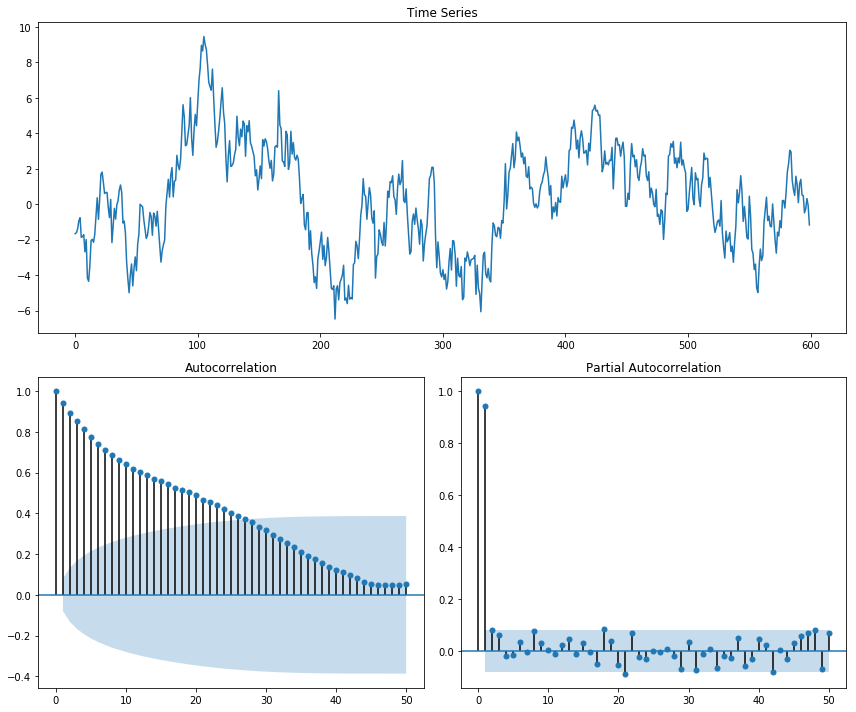

In [3]:
# Generate AR(1) dataset
# non stationary
# The Φ value affects the signal stationarity. For example, if we increase Φ from 0.6 to 0.95 in AR(1) 
# The model tends toward non-stationarity, as shown in the following image:
ar = np.r_[1, -0.95]
ma = np.r_[1, 0]
ar1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1_data)

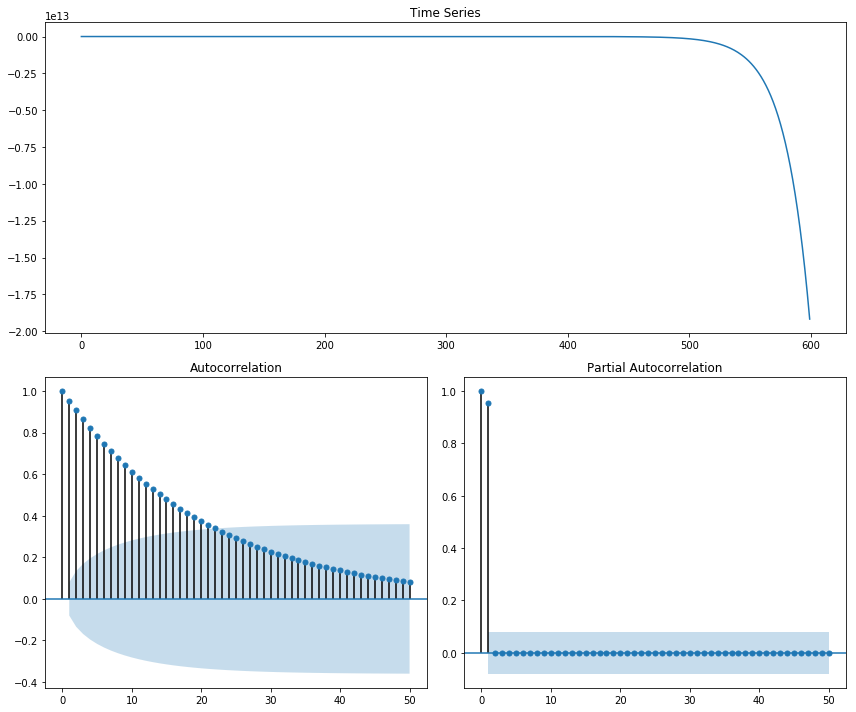

In [4]:
# In scenario Φ>1, the model becomes non-stationary. 
# An example of non-stationary process with Φ>1 is shown here:
ar = np.r_[1, -1.05]
ma = np.r_[1, 0]
ar1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1_data)

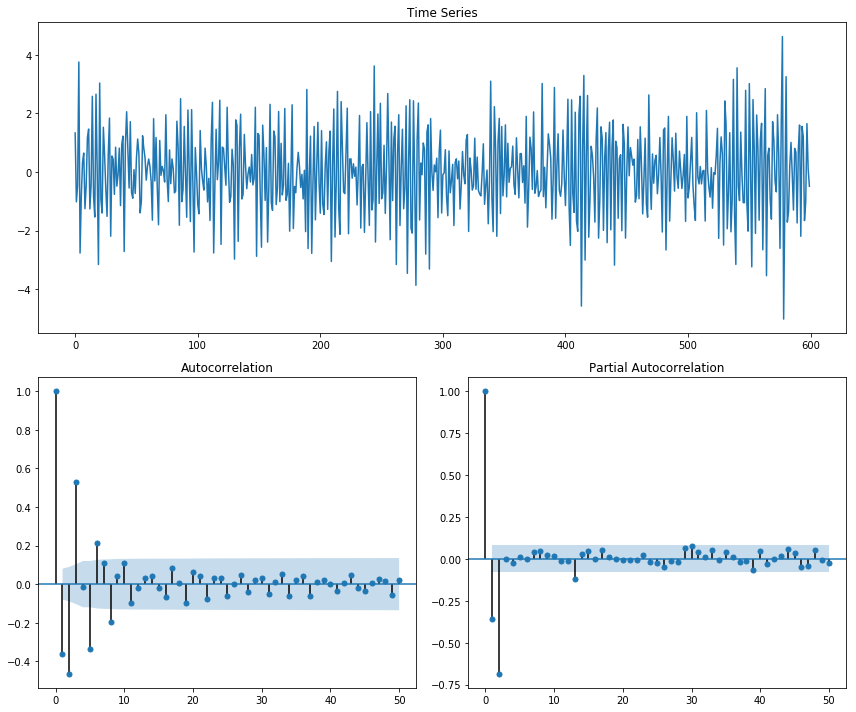

In [5]:
# Generate AR(2) dataset
ar = np.r_[1, 0.6, 0.7]
ma = np.r_[1, 0]
ar2_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar2_data)

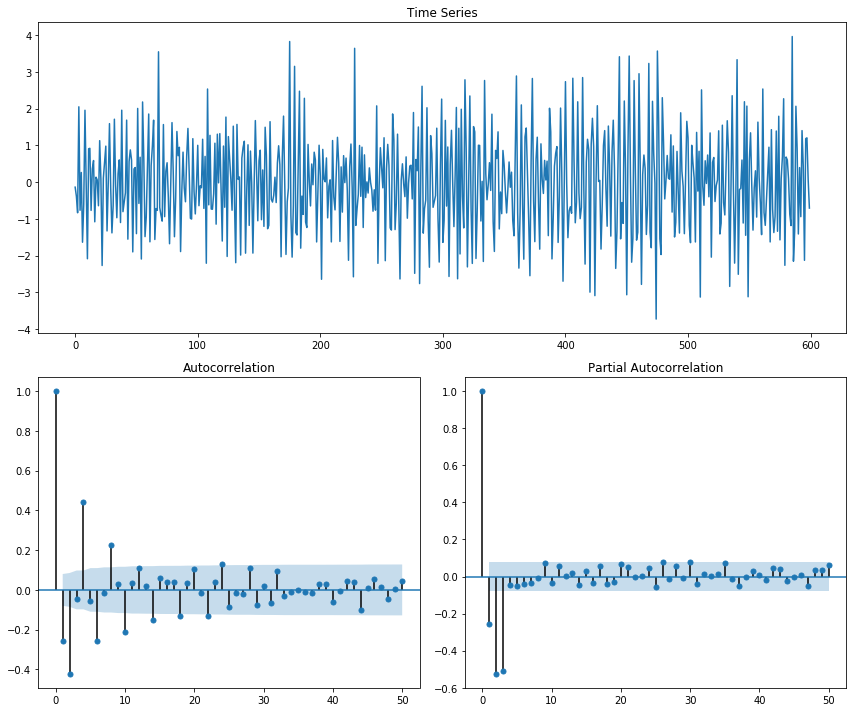

In [6]:
# Generate AR(3) dataset
ar = np.r_[1, 0.6, 0.7, 0.5]
ma = np.r_[1, 0]
ar3_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar3_data)

In [7]:
# Build AR(1) model
# Number of samples
n = 600
# Generate AR(1) dataset
ar = np.r_[1, -0.6]
ma = np.r_[1, 0]
ar1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
ar1model = smtsa.ARMA(ar1_data.tolist(), order=(1, 0))
ar1=ar1model.fit(maxlag=30, method='mle', trend='nc')
ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(1, 0)   Log Likelihood                -862.149
Method:                           mle   S.D. of innovations              1.018
Date:                Sat, 02 May 2020   AIC                           1728.297
Time:                        11:29:49   BIC                           1737.091
Sample:                             0   HQIC                          1731.721
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.6258      0.032     19.709      0.000       0.564       0.688
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5979           +0.0000j            1.5979            0.0000
-----------------------------------------------------------------------------
"""

- The AR(1) is simulated using lag serial correlation of 0.6 and the fitted value is evaluated as 0.58, which is quite close to the actual relationship. 

- Similarly, the AR(3) model is fitted on a generated dataset with AR with an actual generated lag relationship of 0.6, 0.7, and 0.5 and the following is the outcome of the fitted value:

In [8]:
# Build MA(3) model
ar3 = smtsa.ARMA(ar3_data.tolist(), order=(3, 0)).fit(
    maxlag=30, method='mle', trend='nc'
)
ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(3, 0)   Log Likelihood                -824.799
Method:                           mle   S.D. of innovations              0.955
Date:                Sat, 02 May 2020   AIC                           1657.598
Time:                        11:29:49   BIC                           1675.186
Sample:                             0   HQIC                          1664.445
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.6563      0.035    -18.660      0.000      -0.725      -0.587
ar.L2.y       -0.7196      0.033    -21.864      0.000      -0.784      -0.655
ar.L3.y       -0.5057      0.035    -14.410      0.000      -0.574      -0.437
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0190           -1.1632j            1.1634           -0.2474
AR.2            0.0190           +1.1632j            1.1634            0.2474
AR.3           -1.4612           -0.0000j            1.4612           -0.5000
-----------------------------------------------------------------------------
"""

The AR model fitted shows a relationship of 0.58, 0.67 ,and 0.44, which is quite close to the real relationship.

Both AR and MA can be used to correct the serial dependency but usually, positive autocorrelation is corrected using AR models and negative dependency is corrected using MA models.